<a href="https://colab.research.google.com/github/Veera9014/practice-data-science-code/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('claimants.csv')
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
df=data.copy()

In [ ]:
data.drop('CASENUM',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [ ]:
data.dropna(inplace=True)

In [ ]:
x=data.iloc[:,1:]
y=data.iloc[:,0]


In [ ]:
x.shape,y.shape

((1096, 5), (1096,))

In [ ]:
x.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((876, 5), (220, 5), (876,), (220,))

Build the model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
train_predicted=clf.predict(x_train)
train_predicted

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [ ]:
cm=confusion_matrix(y_train, train_predicted)
cm

array([[301, 163],
       [ 98, 314]])

In [ ]:
print(classification_report(y_train,train_predicted))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       464
           1       0.66      0.76      0.71       412

    accuracy                           0.70       876
   macro avg       0.71      0.71      0.70       876
weighted avg       0.71      0.70      0.70       876



Text(0, 0.5, 'True Positive Rate')

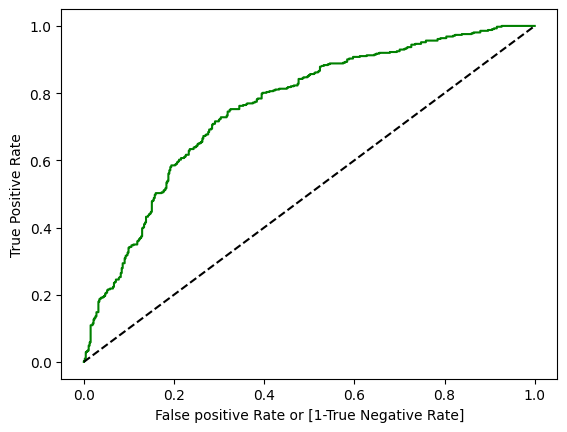

In [ ]:
fpr,tpr,thresholds=roc_curve(y_train,clf.predict_proba(x_train)[:,1])
auc=roc_auc_score(y_train,train_predicted)
import matplotlib.pyplot as plt
x=10
plt.plot(fpr,tpr,
         color='green'
         )
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
auc=roc_auc_score(y_train,train_predicted)

In [ ]:
auc

0.7054214094409106

In [ ]:
test_predicted=clf.predict(x_test)
test_predicted

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
cm=confusion_matrix(y_test,test_predicted)
cm

array([[75, 39],
       [21, 85]])

In [ ]:
print(classification_report(y_test,test_predicted))


              precision    recall  f1-score   support

           0       0.78      0.66      0.71       114
           1       0.69      0.80      0.74       106

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.74      0.73      0.73       220



Text(0, 0.5, 'True Positive Rate')

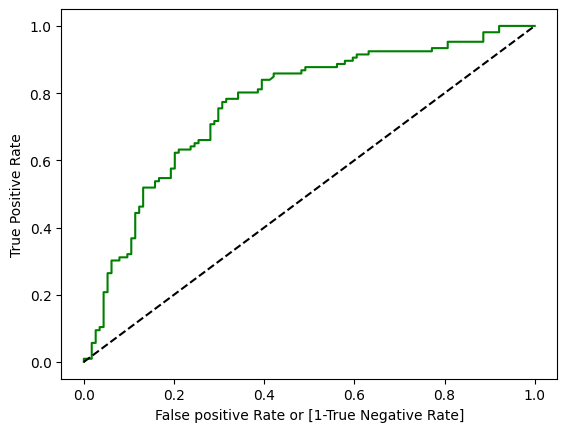

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,clf.predict_proba(x_test)[:,1])
auc=roc_auc_score(y_test,test_predicted)
import matplotlib.pyplot as plt
x=10
plt.plot(fpr,tpr,
         color='green'
         )
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
auc=roc_auc_score(y_test,test_predicted)

In [ ]:
auc

0.7298907646474678

In [ ]:
clf.predict_proba(x_test)

array([[3.10624510e-01, 6.89375490e-01],
       [4.84772978e-01, 5.15227022e-01],
       [8.86167949e-01, 1.13832051e-01],
       [4.07814712e-01, 5.92185288e-01],
       [9.99999670e-01, 3.30421417e-07],
       [2.94009905e-01, 7.05990095e-01],
       [3.30601817e-01, 6.69398183e-01],
       [1.91442942e-01, 8.08557058e-01],
       [9.25409395e-01, 7.45906054e-02],
       [7.72017246e-01, 2.27982754e-01],
       [3.13219876e-01, 6.86780124e-01],
       [2.66210283e-01, 7.33789717e-01],
       [4.28548530e-01, 5.71451470e-01],
       [2.19757748e-01, 7.80242252e-01],
       [2.84927022e-01, 7.15072978e-01],
       [4.64510867e-01, 5.35489133e-01],
       [3.19439328e-01, 6.80560672e-01],
       [5.29228827e-01, 4.70771173e-01],
       [6.83325808e-01, 3.16674192e-01],
       [3.44422734e-01, 6.55577266e-01],
       [5.24694991e-01, 4.75305009e-01],
       [6.67123788e-01, 3.32876212e-01],
       [2.59286764e-01, 7.40713236e-01],
       [3.68546611e-01, 6.31453389e-01],
       [4.704558

In [ ]:
prob_attorney=clf.predict_proba(x_test)[:,1]
prob_attorney

array([6.89375490e-01, 5.15227022e-01, 1.13832051e-01, 5.92185288e-01,
       3.30421417e-07, 7.05990095e-01, 6.69398183e-01, 8.08557058e-01,
       7.45906054e-02, 2.27982754e-01, 6.86780124e-01, 7.33789717e-01,
       5.71451470e-01, 7.80242252e-01, 7.15072978e-01, 5.35489133e-01,
       6.80560672e-01, 4.70771173e-01, 3.16674192e-01, 6.55577266e-01,
       4.75305009e-01, 3.32876212e-01, 7.40713236e-01, 6.31453389e-01,
       5.29544112e-01, 7.45989317e-01, 4.29496388e-01, 6.37847178e-01,
       5.90828252e-01, 4.88957679e-01, 4.24525607e-01, 1.95607002e-01,
       6.17337262e-01, 2.31638292e-01, 3.26095231e-01, 6.21629018e-01,
       1.51618719e-01, 3.50704393e-01, 6.77759199e-01, 6.54832011e-01,
       6.05416542e-01, 5.40030676e-01, 6.55617017e-01, 2.65609311e-01,
       7.51347421e-01, 6.49105579e-01, 5.95434498e-01, 1.15550973e-01,
       3.29803684e-01, 5.84623301e-01, 5.08990676e-01, 1.36167680e-09,
       4.15262792e-01, 5.33411670e-01, 6.85961499e-01, 5.42509401e-01,
      

In [ ]:
prediction=pd.DataFrame({'y':y_test})
prediction

,y
888,1
860,0
1324,0
1235,0
586,0
...,...
424,1
1118,0
815,0
672,1


In [ ]:
prediction['yhat_5']=test_predicted

In [ ]:
prediction

,y,yhat_5
888,1,1
860,0,1
1324,0,0
1235,0,1
586,0,0
...,...,...
424,1,0
1118,0,0
815,0,0
672,1,1


In [ ]:
yhat_75=pd.Series(prob_attorney).apply(lambda x: 0 if x<0.75 else 1)
yhat_75

,0
0,0
1,0
2,0
3,0
4,0
...,...
215,0
216,0
217,0
218,0


In [ ]:
prediction['yhat_75']=yhat_75

In [ ]:
prediction.drop('yhat_75',axis=1,inplace=True)

In [ ]:
prediction['yhat_75']=pd.Series(prob_attorney).apply(lambda x: 0 if x<0.75 else 1)

In [ ]:
prediction

,y,yhat_5,yhat_75
888,1,1,NaN
860,0,1,NaN
1324,0,0,NaN
1235,0,1,NaN
586,0,0,NaN
...,...,...,...
424,1,0,NaN
1118,0,0,NaN
815,0,0,NaN
672,1,1,NaN


In [ ]:
prediction['yhat_4']=pd.Series(prob_attorney).apply(lambda x: 0 if x<0.40 else 1)

In [ ]:
prediction

,y,yhat_5,yhat_75,yhat_4
888,1,1,NaN,NaN
860,0,1,NaN,NaN
1324,0,0,NaN,NaN
1235,0,1,NaN,NaN
586,0,0,NaN,NaN
...,...,...,...,...
424,1,0,NaN,NaN
1118,0,0,NaN,NaN
815,0,0,NaN,NaN
672,1,1,NaN,NaN
